In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter warnings by message
warnings.filterwarnings("ignore")


In [ ]:

# Load the dataset

df = pd.read_csv("/content/final_test.csv")

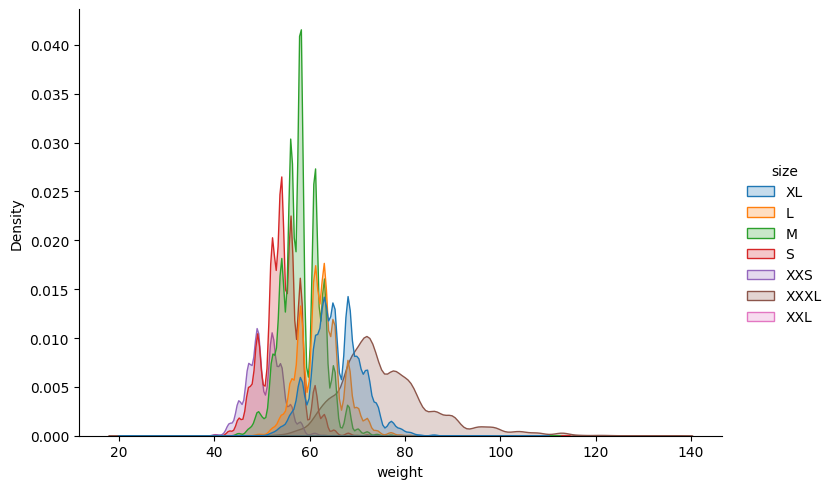

In [ ]:

sns.displot(df, x="weight", hue="size", kind="kde", fill=True , height=5, aspect=1.5)


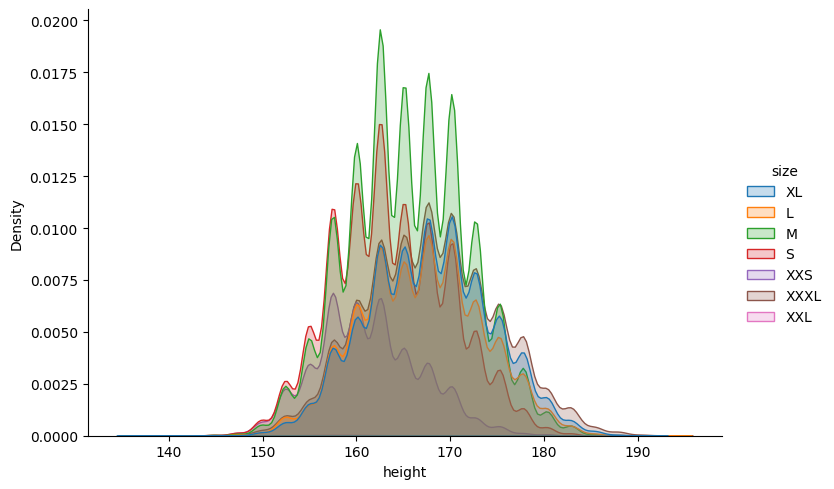

In [ ]:
sns.displot(df, x="height", hue="size", kind="kde", fill=True , height=5, aspect=1.5)



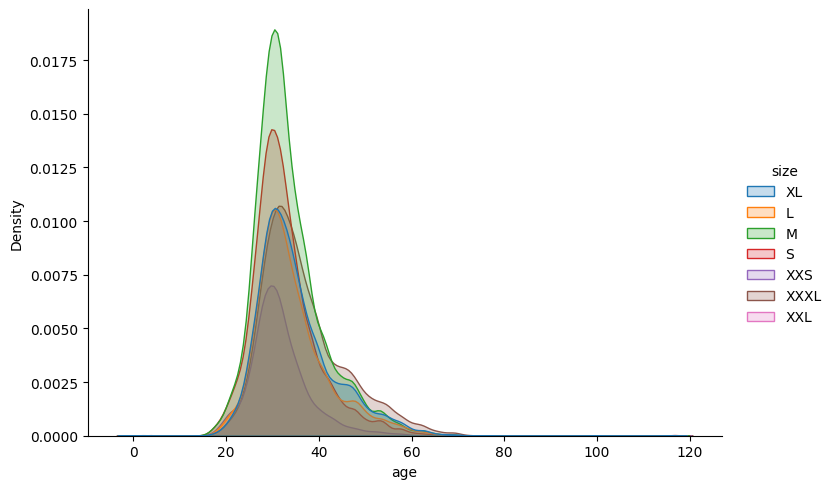

In [ ]:

sns.displot(df, x="age", hue="size", kind="kde", fill=True , height=5, aspect=1.5)

In [ ]:
df['weight'].describe()

count    119734.000000
mean         61.756811
std           9.944863
min          22.000000
25%          55.000000
50%          61.000000
75%          67.000000
max         136.000000
Name: weight, dtype: float64

In [ ]:
df.head(20)

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
5,50,27.0,160.02,S
6,53,65.0,160.02,M
7,51,33.0,160.02,XXS
8,54,26.0,167.64,M
9,53,32.0,165.10,S


In [ ]:
df.isnull().sum()


weight      0
age       257
height    330
size        0
dtype: int64

In [ ]:
df.describe()


,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [ ]:
# drop where size is XXXL and weight is less than 80
df = df.drop(df[(df['size'] == 'XXXL') & (df['weight'] < 80)].index)
# drop where size is XXL and weight is less than 70
df = df.drop(df[(df['size'] == 'XXL') & (df['weight'] < 70)].index)
# drop where size is XL and weight is less than 60
df = df.drop(df[(df['size'] == 'XL') & (df['weight'] < 60)].index)
# drop where size is xxs and weight is greater than 60
df = df.drop(df[(df['size'] == 'XXS') & (df['weight'] > 60)].index)
# drop where size is xs and weight is greater than 70
df = df.drop(df[(df['size'] == 'XS') & (df['weight'] > 70)].index)
# drop where size is s and weight is greater than 80
df = df.drop(df[(df['size'] == 'S') & (df['weight'] > 80)].index)


df.describe()




,weight,age,height
count,101764.000000,101541.000000,101480.000000
mean,60.468201,33.527659,165.645319
std,9.838376,7.806886,6.699432
min,22.000000,0.000000,137.160000
25%,54.000000,29.000000,160.020000
50%,58.000000,32.000000,165.100000
75%,64.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


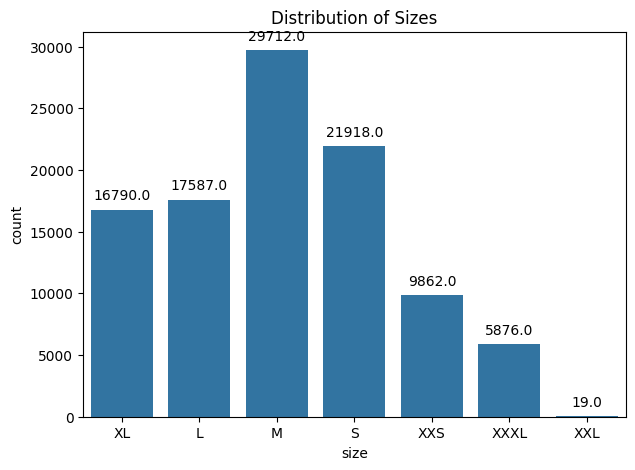

In [ ]:
# Distribution of the target variable 'size' with count annotations
plt.figure(figsize=(7, 5))
sns.countplot(x='size', data=df)
plt.title('Distribution of Sizes')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Resampled dataset shape Counter({'XL': 4822, 'L': 4822, 'M': 4822, 'S': 4822, 'XXS': 4822, 'XXXL': 4822, 'XXL': 4822})


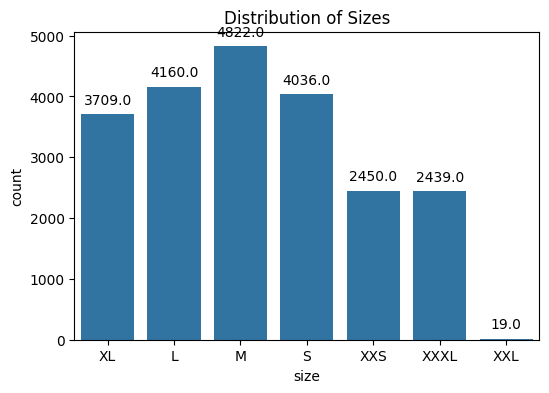

In [ ]:
# generate artificial data to balance the dataset for the target variable 'size'
from imblearn.over_sampling import SMOTE
from collections import Counter
# weight	age	height	size
sm = SMOTE(random_state=42, sampling_strategy='all')
# remove null values
df = df.dropna()
# drop duplicates
df = df.drop_duplicates()

# resample the dataset with max value of 10000
X_res, y_res = sm.fit_resample(df[['weight','age','height']], df['size'])

# add the target variable 'size' to the resampled dataset
X_res['size'] = y_res


print('Resampled dataset shape %s' % Counter(y_res))

# Distribution of the target variable 'size' with count annotations
plt.figure(figsize=(6, 4))
sns.countplot(x='size', data=df)
plt.title('Distribution of Sizes')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()




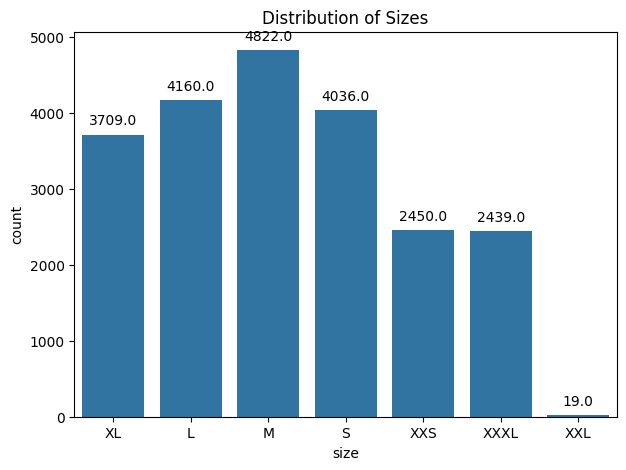

In [ ]:
# Distribution of the target variable 'size' with count annotations
plt.figure(figsize=(7, 5))
sns.countplot(x='size', data=df)
plt.title('Distribution of Sizes')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



In [ ]:
df.describe()

,weight,age,height
count,21635.000000,21635.000000,21635.000000
mean,62.874601,35.627872,165.799718
std,13.334277,10.510064,8.125614
min,22.000000,0.000000,137.160000
25%,54.000000,28.000000,160.020000
50%,61.000000,34.000000,165.100000
75%,68.000000,42.000000,172.720000
max,136.000000,117.000000,193.040000


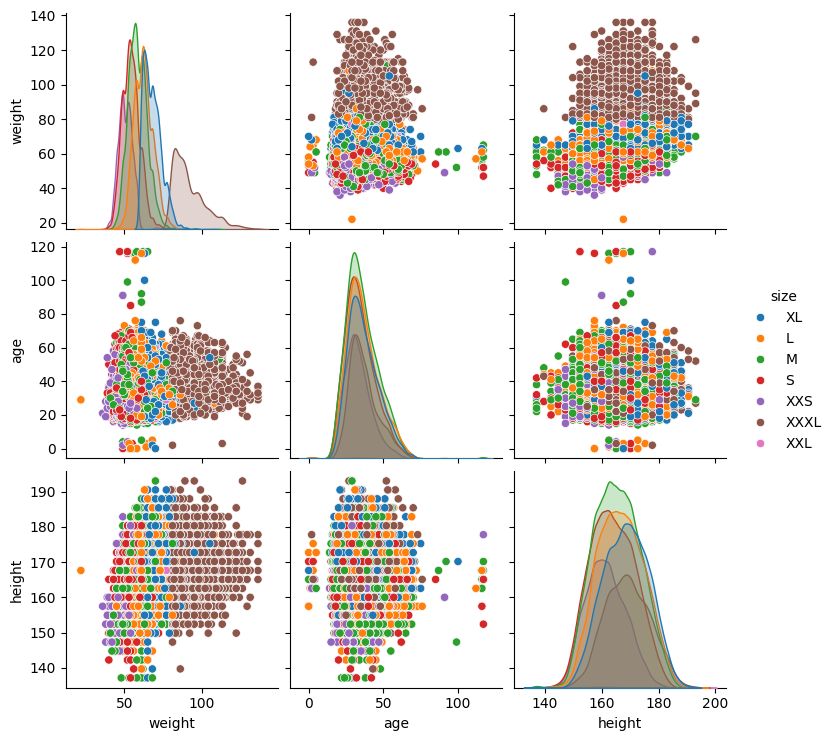

In [ ]:
#distrpution of each column

# sns.pairplot(df[['weight', 'age', 'height', 'size']])
sns.pairplot(df[['weight', 'age', 'height', 'size']], hue='size')
plt.show()

In [ ]:
X_res


,weight,age,height,size
0,62,28.000000,172.720000,XL
1,59,36.000000,167.640000,L
2,61,34.000000,165.100000,M
3,65,27.000000,175.260000,L
4,62,45.000000,172.720000,M
...,...,...,...,...
33749,81,53.000000,175.473684,XXXL
33750,104,43.000000,177.800000,XXXL
33751,81,22.899754,170.180000,XXXL
33752,87,39.000000,175.260000,XXXL


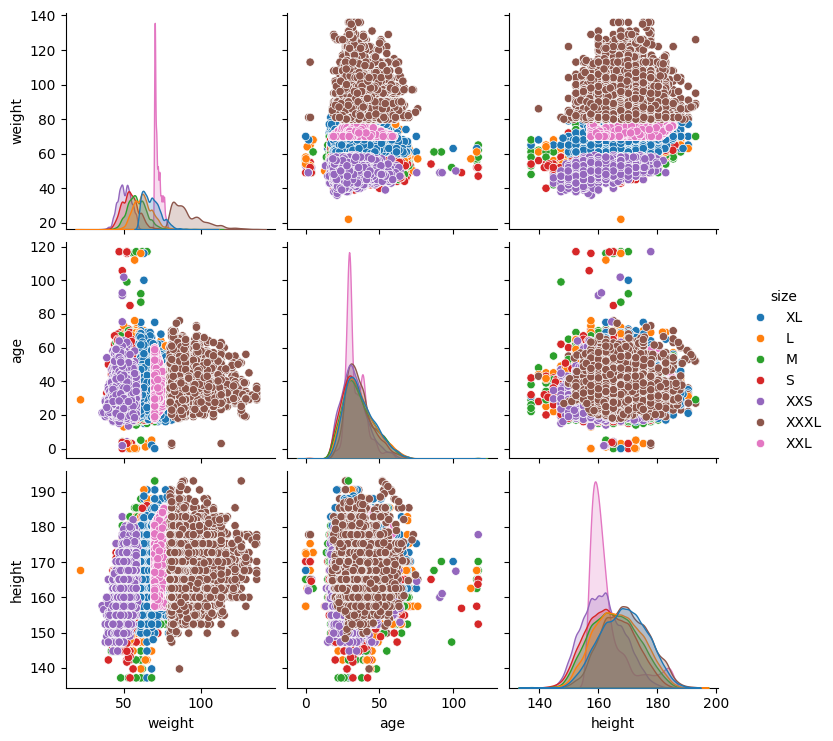

In [ ]:
#distrpution of each column
# sns.pairplot(X_res[['weight', 'age', 'height', 'size']])
sns.pairplot(X_res[['weight', 'age', 'height', 'size']], hue='size')

plt.show()

In [ ]:
df = X_res

In [ ]:
len(df)

33754

In [ ]:

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

weight    0
age       0
height    0
size      0
dtype: int64


In [ ]:
#replace missing values with mean
df['age'].fillna(df['age'].mean(), inplace=True)
df['height'].fillna(df['height'].mean(), inplace=True)


In [ ]:
df.dtypes

weight      int64
age       float64
height    float64
size       object
dtype: object

In [ ]:


# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to category
df[object_columns] = df[object_columns].astype('category')



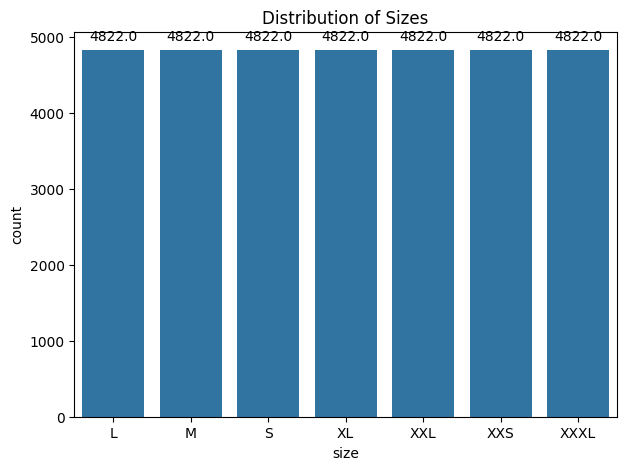

In [ ]:
# Distribution of the target variable 'size' with count annotations
plt.figure(figsize=(7,5))
sns.countplot(x='size', data=df)
plt.title('Distribution of Sizes')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


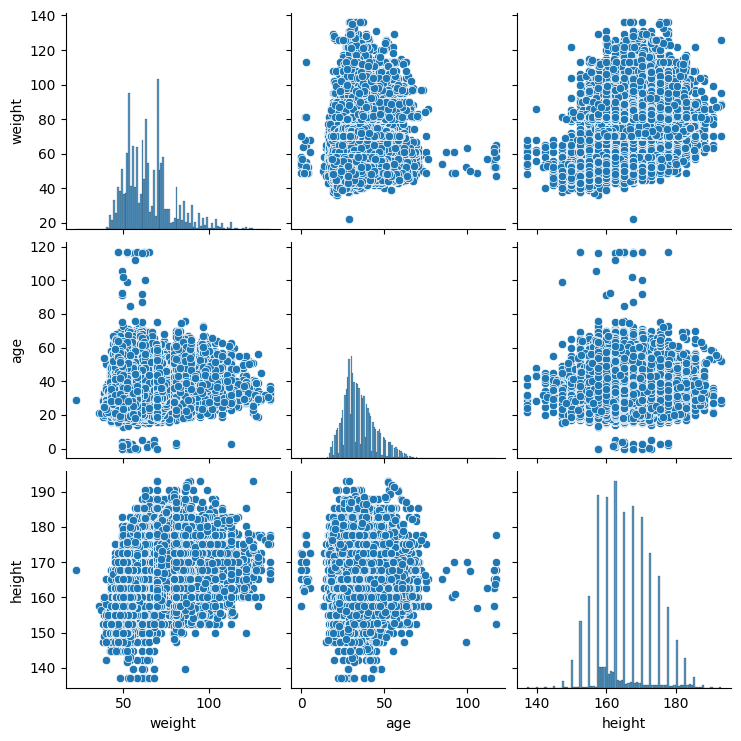

In [ ]:
#distrpution of each column
sns.pairplot(df[['weight', 'age', 'height', 'size']])
plt.show()


In [ ]:
df.corr()

,weight,age,height
weight,1.000000,0.024151,0.316602
age,0.024151,1.000000,0.032546
height,0.316602,0.032546,1.000000


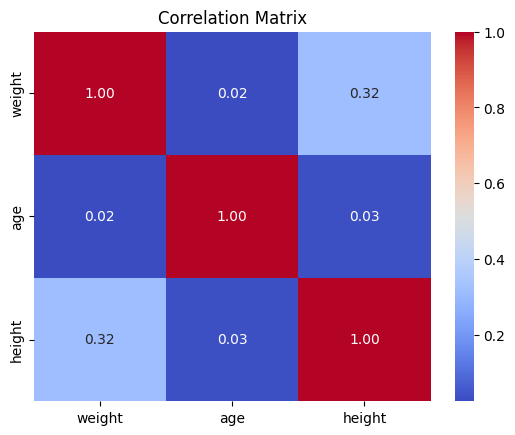

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df.dtypes

weight       int64
age        float64
height     float64
size      category
dtype: object

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


weight    0
age       0
height    0
size      0
dtype: int64

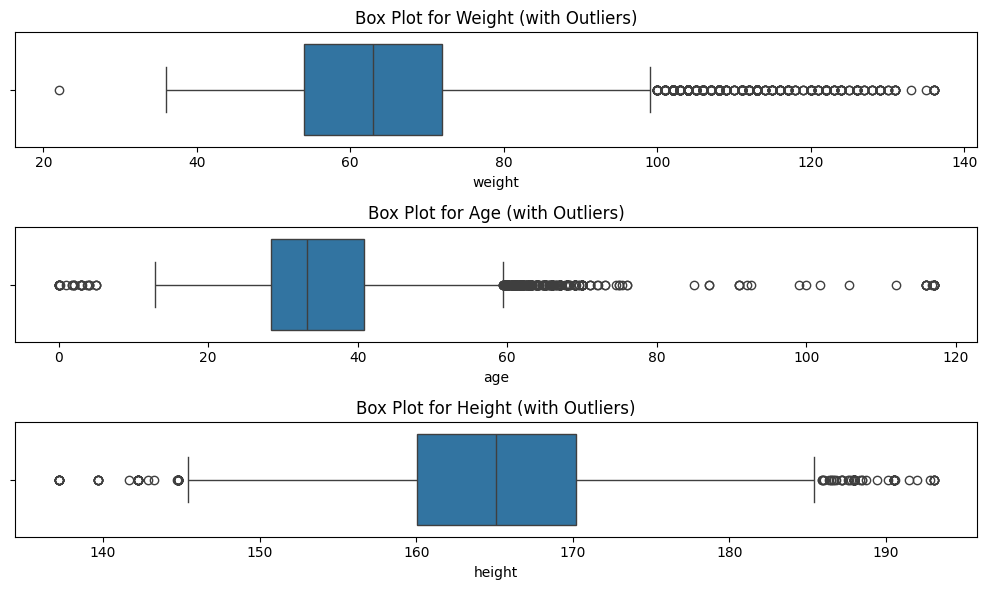

In [ ]:
# Visualize outliers using box plots for all numerical features
plt.figure(figsize=(10,6))
# Box plot for 'weight'
plt.subplot(3, 1, 1)
sns.boxplot(x=df['weight'])
plt.title('Box Plot for Weight (with Outliers)')

# Box plot for 'age'
plt.subplot(3, 1, 2)
sns.boxplot(x=df['age'])
plt.title('Box Plot for Age (with Outliers)')

# Box plot for 'height'
plt.subplot(3, 1, 3)
sns.boxplot(x=df['height'])
plt.title('Box Plot for Height (with Outliers)')
plt.tight_layout()
plt.show()



In [ ]:
# Remove rows where age is greater than 100
#df = df[df['age'] <= 100]
# Remove rows where age is less than or equal to 4
#df = df[df['age'] > 4]

# Assuming 'df' is your DataFrame with the 'age' column

# Get the first quartile (Q1) and third quartile (Q3)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Replace outliers with upper and lower bounds
df['age'] = df['age'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


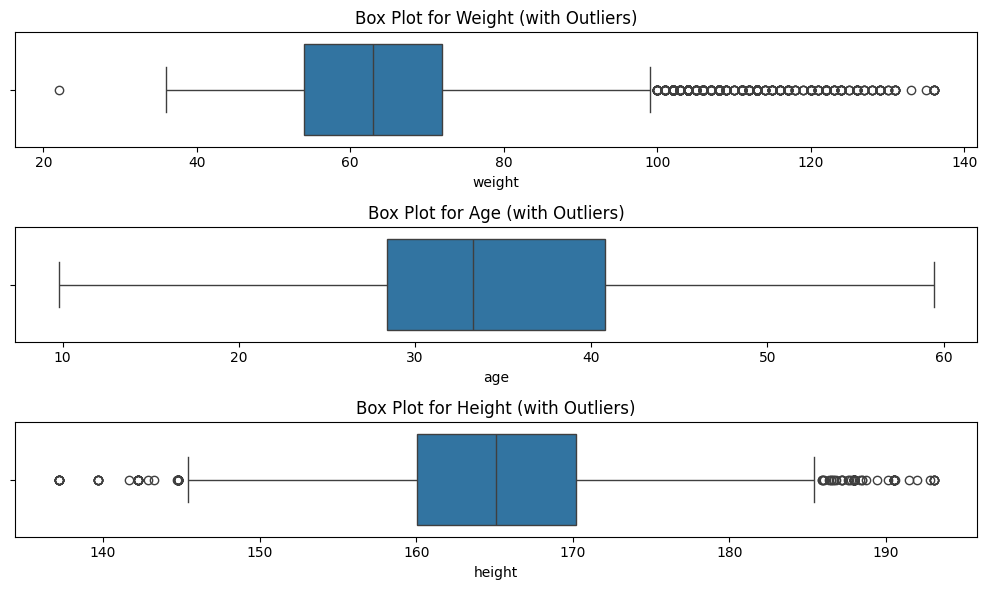

In [ ]:
# Visualize outliers using box plots for all numerical features
plt.figure(figsize=(10,6))

# Box plot for 'weight'
plt.subplot(3, 1, 1)
sns.boxplot(x=df['weight'])
plt.title('Box Plot for Weight (with Outliers)')

# Box plot for 'age'
plt.subplot(3, 1, 2)
sns.boxplot(x=df['age'])
plt.title('Box Plot for Age (with Outliers)')

# Box plot for 'height'
plt.subplot(3, 1, 3)
sns.boxplot(x=df['height'])
plt.title('Box Plot for Height (with Outliers)')

plt.tight_layout()
plt.show()

In [ ]:
df['weight'].describe()

count    33754.000000
mean        65.239261
std         14.346549
min         22.000000
25%         54.000000
50%         63.000000
75%         72.000000
max        136.000000
Name: weight, dtype: float64

DataFrame with BMI Column:
    weight   age  height size        bmi
0      62  28.0  172.72   XL  20.782914
1      59  36.0  167.64    L  20.994073
2      61  34.0  165.10    M  22.378743
3      65  27.0  175.26    L  21.161563
4      62  45.0  172.72    M  20.782914


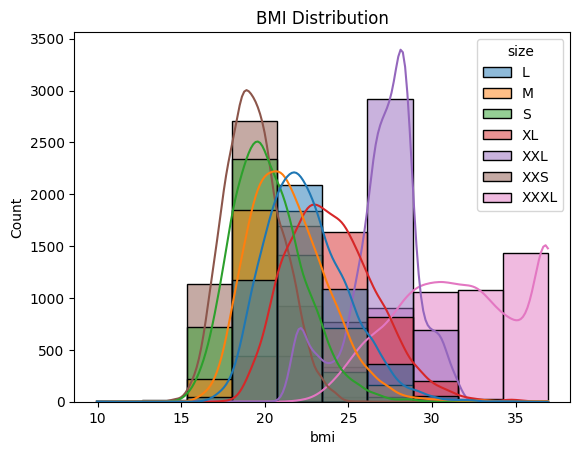

In [ ]:
# Calculate BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Display the DataFrame with the new 'bmi' column
print("DataFrame with BMI Column:\n", df.head())

# remove bmi outliers using IQR
# Get the first quartile (Q1) and third quartile (Q3)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Replace outliers with upper and lower bounds
df['bmi'] = df['bmi'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Visualize bmi histogram with size as hue
sns.histplot(data=df, x='bmi', hue='size', kde=True, bins=10)
plt.title('BMI Distribution')
plt.show()

# df_new = df.copy()
# # if bmi is less than 18.5, then size is XS
# df_new.loc[df_new['bmi'] < 18.5, 'size'] = 'XS'


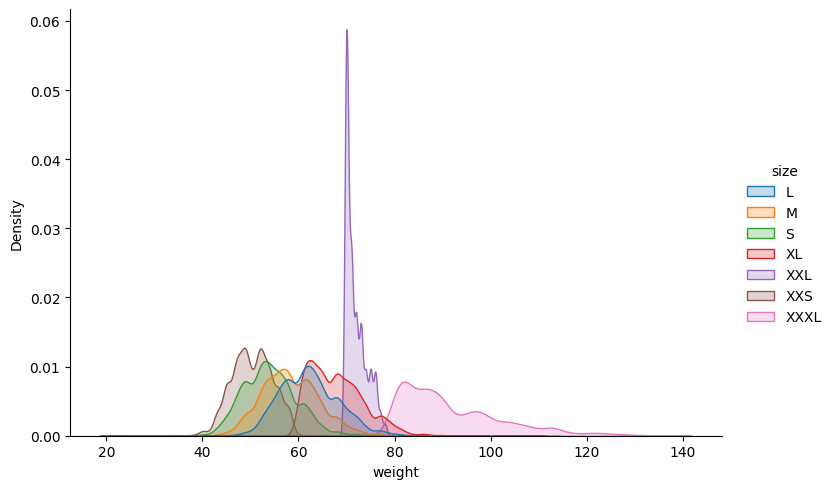

In [ ]:
# Visualize weight histogram with size as hue with large figure size
sns.displot(df, x="weight", hue="size", kind="kde", fill=True , height=5, aspect=1.5)

#**feature extraction after bmi**

In [ ]:
# Assuming 'df' is your DataFrame with columns 'weight', 'height', and other relevant features

# Calculate neck circumference (example formula)
df['neck_circumference'] = 0.2 * df['height'] + 0.1 * df['weight']

# Calculate waist circumference (example formula)
df['waist_circumference'] = 0.5 * df['height'] + 0.2 * df['weight']

# Display the DataFrame with new features
print("DataFrame with Neck and Waist Circumference:\n", df.head())


DataFrame with Neck and Waist Circumference:
    weight   age  height size        bmi  neck_circumference  \
0      62  28.0  172.72   XL  20.782914              40.744   
1      59  36.0  167.64    L  20.994073              39.428   
2      61  34.0  165.10    M  22.378743              39.120   
3      65  27.0  175.26    L  21.161563              41.552   
4      62  45.0  172.72    M  20.782914              40.744   

   waist_circumference  
0                98.76  
1                95.62  
2                94.75  
3               100.63  
4                98.76  


In [ ]:

# Assuming 'df' is your DataFrame with columns 'weight', 'height', 'waist_circumference', 'shoulder_circumference', 'torso_length', 'age', 'gender'


# Calculate Waist-to-Hip Ratio (WHR)
# Estimate hip_circumference if not available
df['hip_circumference'] = 0.85 * df['waist_circumference']
df['whr'] = df['waist_circumference'] / df['hip_circumference']

# Estimate shoulder_circumference if not available
df['shoulder_circumference'] = 0.2 * df['height'] + 0.1 * df['weight']

# Calculate Shoulder-to-Waist Ratio
df['shoulder_to_waist_ratio'] = df['shoulder_circumference'] / df['waist_circumference']

# Estimate torso_length if not available
df['torso_length'] = 0.45 * df['height']
# Calculate Leg Length
df['leg_length'] = df['height'] - df['torso_length']

# Display the DataFrame with new features
print("DataFrame with Additional Features:\n", df.head())
df

DataFrame with Additional Features:
    weight   age  height size        bmi  neck_circumference  \
0      62  28.0  172.72   XL  20.782914              40.744   
1      59  36.0  167.64    L  20.994073              39.428   
2      61  34.0  165.10    M  22.378743              39.120   
3      65  27.0  175.26    L  21.161563              41.552   
4      62  45.0  172.72    M  20.782914              40.744   

   waist_circumference  hip_circumference       whr  shoulder_circumference  \
0                98.76            83.9460  1.176471                  40.744   
1                95.62            81.2770  1.176471                  39.428   
2                94.75            80.5375  1.176471                  39.120   
3               100.63            85.5355  1.176471                  41.552   
4                98.76            83.9460  1.176471                  40.744   

   shoulder_to_waist_ratio  torso_length  leg_length  
0                 0.412556        77.724      94.996  

,weight,age,height,size,bmi,neck_circumference,waist_circumference,hip_circumference,whr,shoulder_circumference,shoulder_to_waist_ratio,torso_length,leg_length
0,62,28.000000,172.720000,XL,20.782914,40.744000,98.760000,83.946000,1.176471,40.744000,0.412556,77.724000,94.996000
1,59,36.000000,167.640000,L,20.994073,39.428000,95.620000,81.277000,1.176471,39.428000,0.412341,75.438000,92.202000
2,61,34.000000,165.100000,M,22.378743,39.120000,94.750000,80.537500,1.176471,39.120000,0.412876,74.295000,90.805000
3,65,27.000000,175.260000,L,21.161563,41.552000,100.630000,85.535500,1.176471,41.552000,0.412919,78.867000,96.393000
4,62,45.000000,172.720000,M,20.782914,40.744000,98.760000,83.946000,1.176471,40.744000,0.412556,77.724000,94.996000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33749,81,53.000000,175.473684,XXXL,26.306376,43.194737,103.936842,88.346316,1.176471,43.194737,0.415586,78.963158,96.510526
33750,104,43.000000,177.800000,XXXL,32.898025,45.960000,109.700000,93.245000,1.176471,45.960000,0.418961,80.010000,97.790000
33751,81,22.899754,170.180000,XXXL,27.968423,42.136000,101.290000,86.096500,1.176471,42.136000,0.415994,76.581000,93.599000
33752,87,39.000000,175.260000,XXXL,28.323938,43.752000,105.030000,89.275500,1.176471,43.752000,0.416567,78.867000,96.393000


#**normalization and encoding**

In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# df[['weight', 'age', 'height','neck_circumference','waist_circumference','bmi',	'hip_circumference',	'whr',	'shoulder_circumference',	'shoulder_to_waist_ratio',	'torso_length',	'leg_length']] = scaler.fit_transform(df[['weight', 'age', 'height','neck_circumference','bmi',	'waist_circumference',	'hip_circumference',	'whr',	'shoulder_circumference',	'shoulder_to_waist_ratio',	'torso_length',	'leg_length']])
df[['weight', 'age', 'height','bmi']] = scaler.fit_transform(df[['weight', 'age', 'height', 'bmi']])


In [ ]:

# Encoding the target variable 'size'
size_mapping = {'XXS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5, 'XXL': 6, 'XXXL': 7}
df['size'] = df['size'].map(size_mapping)

# df_encoded = df[['weight', 'age', 'height','neck_circumference','bmi',	'waist_circumference',	'hip_circumference',	'whr',	'shoulder_circumference',	'shoulder_to_waist_ratio',	'torso_length',	'leg_length','size']]
df_encoded = df[['weight', 'age', 'height','bmi','size']]
df=df_encoded
df

,weight,age,height,bmi,size
0,0.350877,0.367063,0.636364,0.401444,5
1,0.324561,0.528188,0.545455,0.409270,4
2,0.342105,0.487906,0.500000,0.460593,3
3,0.377193,0.346922,0.681818,0.415478,4
4,0.350877,0.709453,0.636364,0.401444,3
...,...,...,...,...,...
33749,0.517544,0.870578,0.685642,0.606169,7
33750,0.719298,0.669172,0.727273,0.850487,7
33751,0.517544,0.264341,0.590909,0.667773,7
33752,0.570175,0.588609,0.681818,0.680950,7


In [ ]:
columns = df.columns.to_list()
columns.append(columns.pop(columns.index("size")))
df = df[columns]
df

,weight,age,height,bmi,size
0,0.350877,0.367063,0.636364,0.401444,5
1,0.324561,0.528188,0.545455,0.409270,4
2,0.342105,0.487906,0.500000,0.460593,3
3,0.377193,0.346922,0.681818,0.415478,4
4,0.350877,0.709453,0.636364,0.401444,3
...,...,...,...,...,...
33749,0.517544,0.870578,0.685642,0.606169,7
33750,0.719298,0.669172,0.727273,0.850487,7
33751,0.517544,0.264341,0.590909,0.667773,7
33752,0.570175,0.588609,0.681818,0.680950,7


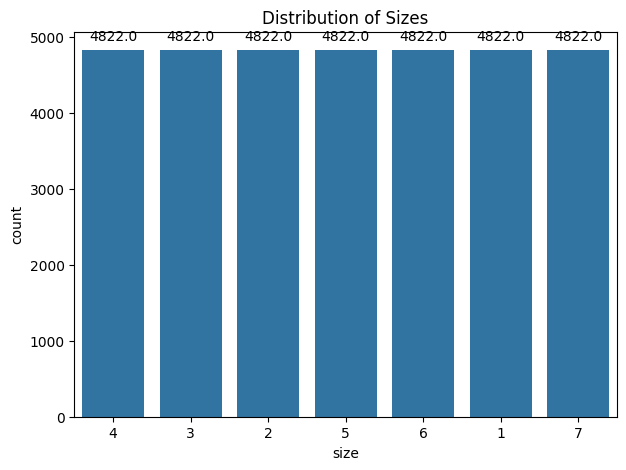

In [ ]:
# Distribution of the target variable 'size' with count annotations
plt.figure(figsize=(7, 5))
sns.countplot(x='size', data=df)
plt.title('Distribution of Sizes')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:

X = df.drop('size', axis=1)
y = df['size']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df

,weight,age,height,bmi,size
0,0.350877,0.367063,0.636364,0.401444,5
1,0.324561,0.528188,0.545455,0.409270,4
2,0.342105,0.487906,0.500000,0.460593,3
3,0.377193,0.346922,0.681818,0.415478,4
4,0.350877,0.709453,0.636364,0.401444,3
...,...,...,...,...,...
33749,0.517544,0.870578,0.685642,0.606169,7
33750,0.719298,0.669172,0.727273,0.850487,7
33751,0.517544,0.264341,0.590909,0.667773,7
33752,0.570175,0.588609,0.681818,0.680950,7


# **linear regression model**


In [ ]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Instantiate the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate MSE and R^2
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("MSE:", mse)
print("R^2:", r2)

# Perform 5-fold cross validation
scores = cross_val_score(lin_reg, X, y, cv=5)
print("Cross-validated scores:", scores)

# Get a random sample index
random_index = X_test.sample().index[0]

# Print the random sample
print(X_test.loc[random_index])

# Print the corresponding label
print(y_test.loc[random_index])

# Make predictions on the random sample using the best voting regressor
print(lin_reg.predict([X_test.loc[random_index]]))


MSE: 0.9604813415802916
R^2: 0.7732455552280519
Cross-validated scores: [0.72592612 0.70747941 0.66273179 0.57797579 0.84052077]
weight    0.394737
age       0.548328
height    0.681818
bmi       0.439612
Name: 19044, dtype: float64
4
[4.17301871]


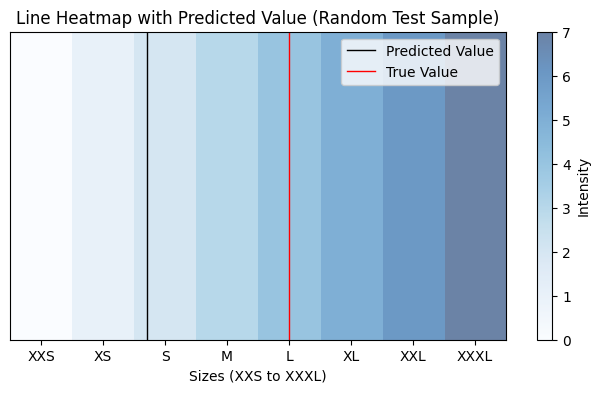

In [ ]:
#lin_reg
import matplotlib.pyplot as plt
import numpy as np
# Generate a random index from the test set
random_index = np.random.choice(len(X_test))

# Define the size range from XXS to XXXL
sizes = np.arange(0, 8)
sizes_labels = ['XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL']

# Predicted value
predicted_value = lin_reg.predict([X_test.iloc[random_index]])[0]
true_value = y_test.iloc[random_index]

# Create a colormap for the heatmap
cmap = plt.get_cmap('Blues')

# Plot the line heatmap
plt.figure(figsize=(8, 4))

# Add a heatmap background
heatmap = plt.imshow([np.arange(0, 8)], cmap=cmap, aspect='auto', extent=[sizes[0] - 0.5, sizes[-1] + 0.5, 0, 1], alpha=0.6)

# add the predicted value as a vertical line
plt.axvline(predicted_value, color='k', linestyle='-', linewidth=1)

# add the true value as a vertical line
plt.axvline(true_value, color='r', linestyle='-', linewidth=1)

# Customize the plot
plt.xticks(sizes, sizes_labels)
plt.yticks([])
plt.xlabel('Sizes (XXS to XXXL)')
plt.title('Line Heatmap with Predicted Value (Random Test Sample)')
plt.legend(['Predicted Value', 'True Value'])

# Show the colorbar for the heatmap
cbar = plt.colorbar(heatmap)
cbar.set_label('Intensity')

# Display the plot
plt.show()


In [ ]:
#size recommendation for linear regression
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Function to calculate BMI
def calculate_bmi(weight, height):
    return weight / ((height / 100) ** 2)

# Function to normalize user input
def normalize_input(user_input, scaler):
    normalized_input = scaler.transform(user_input.reshape(1, -1))
    return normalized_input

# Function to predict size and provide recommendations
def predict_size_and_recommend(user_input, lin_reg, scaler, size_mapping):
    # Calculate BMI
    bmi = calculate_bmi(user_input[0], user_input[2])

    # Add BMI to user input
    user_input_with_bmi = np.append(user_input, bmi)
    print(user_input_with_bmi)

    # Normalize input
    normalized_input = normalize_input(user_input_with_bmi, scaler)
    print(normalized_input)
    # Predict size
    predicted_size = lin_reg.predict(normalized_input)[0]
    print(predicted_size)
    # Map predicted size to category
    for size, encoded_size in size_mapping.items():
        if encoded_size == predicted_size:
            predicted_size_category = size
            break
    else:
        # Handle the case when predicted size is not in the categories
        # Find the two sizes between which the predicted size falls
        sizes = list(size_mapping.keys())
        sizes.sort(key=lambda s: size_mapping[s])

        for i in range(len(sizes) - 1):
            if size_mapping[sizes[i]] < predicted_size < size_mapping[sizes[i+1]]:
                recommended_sizes = [sizes[i], sizes[i+1]]
                break
        else:
            # Edge case if the predicted size is smaller than the smallest size
            recommended_sizes = [sizes[5], sizes[6]]

        return f"The predicted size is not in the defined categories. Recommended sizes: {', '.join(recommended_sizes)}"

    return f"Predicted size: {predicted_size_category}"

# User input
age = float(input("Enter age: "))
weight = float(input("Enter weight (kg): "))
height = float(input("Enter height (cm): "))

# Create user input array
user_input = np.array([weight, age, height])

# Load the trained Linear Regression model and MinMaxScaler
# (Assuming 'lin_reg', 'scaler', and 'size_mapping' are already defined)

# Predict size and provide recommendations
result = predict_size_and_recommend(user_input, lin_reg, scaler, size_mapping)
# Print the result
print(result)


Enter age: 28
Enter weight (kg): 100
Enter height (cm): 170
[100.          28.         170.          34.60207612]
[[0.68421053 0.36706272 0.5876879  0.9136477 ]]
8.094240416727871
The predicted size is not in the defined categories. Recommended sizes: XXL, XXXL


#**Voting classifier**

In [ ]:
#voting classifier
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assume X and y are your feature matrix and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate linear models
linear_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# Create a Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('linear_regression', linear_reg),
    ('ridge_regression', ridge),
    ('lasso_regression', lasso)
])

# Define the parameter grid for Grid Search
param_grid = {
    'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10],
    'lasso_regression__alpha': [0.001, 0.01, 0.1, 1, 10]
}

# GridSearchCV instantiation
grid_search = GridSearchCV(estimator=voting_regressor,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best Voting Regressor model from GridSearchCV
best_voting_regressor = grid_search.best_estimator_

# Predict on the test set
y_pred = best_voting_regressor.predict(X_test_scaled)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error (MSE):", mse)

# Calculate MSE and R^2
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("MSE:", mse)
print("R^2:", r2)

# Perform 5-fold cross validation
scores = cross_val_score(best_voting_regressor, X, y, cv=5)
print("Cross-validated scores:", scores)


# Get a random sample index
random_index = X_test.sample().index[0]

# Print the random sample
print(X_test.loc[random_index])

# Print the corresponding label
print(y_test.loc[random_index])

# Make predictions on the random sample using the best voting regressor
print(best_voting_regressor.predict([X_test.loc[random_index]]))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'lasso_regression__alpha': 0.001, 'ridge_regression__alpha': 0.001}
MSE: 0.9605782072508341
R^2: 0.7731998160179823
Cross-validated scores: [0.72703719 0.7091099  0.66718337 0.57090811 0.8364952 ]
weight    0.421053
age       0.328035
height    0.409091
bmi       0.644366
Name: 26472, dtype: float64
6
[5.92558235]


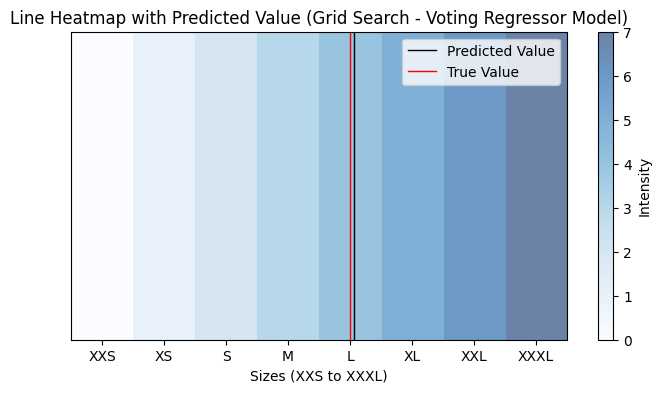

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Randomly select a sample index
sample = np.random.randint(0, len(X_test_scaled))

# Define the size range from XXS to XXXL
sizes = np.arange(0, 8)
sizes_labels = ['XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL']

# Predicted value using the best Voting Regressor model
predicted_value = best_voting_regressor.predict(X_test_scaled[sample].reshape(1, -1))[0]

# True value
true_value = y_test.iloc[sample]

# Create a colormap for the heatmap
cmap = plt.get_cmap('Blues')

# Plot the line heatmap
plt.figure(figsize=(8, 4))

# Add a heatmap background
heatmap = plt.imshow([np.arange(0, 8)], cmap=cmap, aspect='auto', extent=[sizes[0] - 0.5, sizes[-1] + 0.5, 0, 1], alpha=0.6)

# Add the predicted value as a vertical line
plt.axvline(predicted_value, color='k', linestyle='-', linewidth=1)

# Add the true value as a vertical line
plt.axvline(true_value, color='r', linestyle='-', linewidth=1)

# Customize the plot
plt.xticks(sizes, sizes_labels)
plt.yticks([])
plt.xlabel('Sizes (XXS to XXXL)')
plt.title('Line Heatmap with Predicted Value (Grid Search - Voting Regressor Model)')
plt.legend(['Predicted Value', 'True Value'])

# Show the colorbar for the heatmap
cbar = plt.colorbar(heatmap)
cbar.set_label('Intensity')

# Display the plot
plt.show()


In [ ]:


#size recommendation for voting classifier
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Function to calculate BMI
def calculate_bmi(weight, height):
    return weight / ((height / 100) ** 2)

# Function to normalize user input
def normalize_input(user_input, scaler):
    normalized_input = scaler.transform(user_input.reshape(1, -1))
    return normalized_input

# Function to predict size and provide recommendations
def predict_size_and_recommend(user_input, voting_regressor, scaler, size_mapping):
    # Calculate BMI
    bmi = calculate_bmi(user_input[0], user_input[2])

    # Add BMI to user input
    user_input_with_bmi = np.append(user_input, bmi)
    print(user_input_with_bmi)

    # Normalize input
    normalized_input = normalize_input(user_input_with_bmi, scaler)
    print(normalized_input)
    # Predict size
    predicted_size = lin_reg.predict(normalized_input)[0]
    print(predicted_size)
    # Map predicted size to category
    for size, encoded_size in size_mapping.items():
        if encoded_size == predicted_size:
            predicted_size_category = size
            break
    else:
        # Handle the case when predicted size is not in the categories
        # Find the two sizes between which the predicted size falls
        sizes = list(size_mapping.keys())
        sizes.sort(key=lambda s: size_mapping[s])

        for i in range(len(sizes) - 1):
            if size_mapping[sizes[i]] < predicted_size < size_mapping[sizes[i+1]]:
                recommended_sizes = [sizes[i], sizes[i+1]]
                break
        else:
            # Edge case if the predicted size is smaller than the smallest size
            recommended_sizes = [sizes[0], sizes[1
                                                 ]]

        return f"The predicted size is not in the defined categories. Recommended sizes: {', '.join(recommended_sizes)}"

    return f"Predicted size: {predicted_size_category}"

# User input
age = float(input("Enter age: "))
weight = float(input("Enter weight (kg): "))
height = float(input("Enter height (cm): "))

# Create user input array
user_input = np.array([weight, age, height])

# Load the trained Linear Regression model and MinMaxScaler
# (Assuming 'lin_reg', 'scaler', and 'size_mapping' are already defined)

# Predict size and provide recommendations
result = predict_size_and_recommend(user_input, voting_regressor, scaler, size_mapping)

# Print the result
print(result)



Enter age: 21
Enter weight (kg): 58
Enter height (cm): 175
[ 58.          21.         175.          18.93877551]
[[ 457.65012954  106.13126594 1213.72077116  104.46344054]]
7497.429385888356
The predicted size is not in the defined categories. Recommended sizes: XXS, S


#**Trash**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge
# from sklearn.preprocessing import StandardScaler

# # Assuming X_train and y_train are your training data
# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# # Define the parameter grid for Ridge regression
# param_grid = {
#     'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
# }

# # Instantiate Ridge regression model
# ridge_model = Ridge()

# # GridSearchCV instantiation
# grid_search = GridSearchCV(estimator=ridge_model,
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='neg_mean_squared_error',  # Use neg_mean_squared_error for regression
#                            verbose=2,
#                            n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train_scaled, y_train)

# # Print the best parameters found by GridSearchCV
# print("Best Parameters:", grid_search.best_params_)

# # Get the best Ridge model from GridSearchCV
# best_ridge_model = grid_search.best_estimator_

# # Now, you can use best_ridge_model for predictions on your test set.


In [ ]:
# from sklearn.metrics import mean_squared_error

# # Assuming X_test is your test data
# X_test_scaled = scaler.transform(X_test)

# # Predict on the test set using the best Ridge model
# y_pred_test = best_ridge_model.predict(X_test_scaled)

# # Calculate Mean Squared Error
# mse_test = mean_squared_error(y_test, y_pred_test)

# # Print the MSE on the test set
# print("Mean Squared Error on test set:", mse_test)



In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Randomly select a sample index
# sample = np.random.randint(0, len(X_test_scaled))

# # Define the size range from XXS to XXXL
# sizes = np.arange(0, 8)
# sizes_labels = ['XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL']

# # Predicted value using the best Ridge model
# predicted_value = best_ridge_model.predict(X_test_scaled[sample].reshape(1, -1))[0]

# # True value
# true_value = y_test.iloc[sample]

# # Create a colormap for the heatmap
# cmap = plt.get_cmap('Blues')

# # Plot the line heatmap
# plt.figure(figsize=(8, 4))

# # Add a heatmap background
# heatmap = plt.imshow([np.arange(0, 8)], cmap=cmap, aspect='auto', extent=[sizes[0] - 0.5, sizes[-1] + 0.5, 0, 1], alpha=0.6)

# # Add the predicted value as a vertical line
# plt.axvline(predicted_value, color='k', linestyle='-', linewidth=1)

# # Add the true value as a vertical line
# plt.axvline(true_value, color='r', linestyle='-', linewidth=1)

# # Customize the plot
# plt.xticks(sizes, sizes_labels)
# plt.yticks([])
# plt.xlabel('Sizes (XXS to XXXL)')
# plt.title('Line Heatmap with Predicted Value (Grid Search - Ridge Model)')
# plt.legend(['Predicted Value', 'True Value'])

# # Show the colorbar for the heatmap
# cbar = plt.colorbar(heatmap)
# cbar.set_label('Intensity')

# # Display the plot
# plt.show()



In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# sample = 9
# # Define the size range from XXS to XXXL
# sizes = np.arange(0, 8)
# sizes_labels = ['XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL']

# # Predicted value
# predicted_value = lin_reg.predict([X_test.iloc[sample]])[0]
# True_value = y_test.iloc[sample]

# # Create a colormap for the heatmap
# cmap = plt.get_cmap('Blues')

# # Plot the line heatmap
# plt.figure(figsize=(8, 4))

# # Add a heatmap background
# heatmap = plt.imshow([np.arange(0, 8)], cmap=cmap, aspect='auto', extent=[sizes[0] - 0.5, sizes[-1] + 0.5, 0, 1], alpha=0.6)

# # add the predicted value as a vertical line
# plt.axvline(predicted_value, color='k', linestyle='-', linewidth=1)

# # add the true value as a vertical line
# plt.axvline(True_value, color='r', linestyle='-', linewidth=1)


# # Customize the plot
# plt.xticks(sizes, sizes_labels)
# plt.yticks([])
# plt.xlabel('Sizes (XXS to XXXL)')
# plt.title('Line Heatmap with Predicted Value')
# plt.legend(['Predicted Value', 'True Value'])

# # Show the colorbar for the heatmap
# cbar = plt.colorbar(heatmap)
# cbar.set_label('Intensity')

# # Display the plot
# plt.show()


In [ ]:
# #logistic regression and svm
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # import svm model
# from sklearn import svm
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.metrics import accuracy_score, classification_report
# # Logistic Regression Model Instantiation with Class Weights
# logreg_model = LogisticRegression()
# svm_model = svm.SVC()
# # Define the parameter grid for grوid search
# param_grid = {
#     'C': [10],
#     'penalty': ['l2'],
#     'solver': ['liblinear'],
#     # 'class_weight': [None, 'balanced']
#     'class_weight': ['balanced', None]
#     #
# }

# # GridSearchCV instantiation
# grid_search = GridSearchCV(estimator=logreg_model,
#                            param_grid=param_grid,
#                            cv=3,
#                            scoring='accuracy',
#                            verbose=2,
#                            n_jobs=-1)

# # svm
# param_grid_svm = {
#     'C': [ 10],
#     'kernel': ['linear', 'poly'],
#     'degree': [1, 5],
#     'gamma': ['scale', 'auto'],
#     'class_weight': ['balanced', None]
# }

# grid_search_svm = GridSearchCV(estimator=svm_model,
#                             param_grid=param_grid_svm,
#                             cv=3,
#                             scoring='accuracy',
#                             verbose=2,
#                             n_jobs=-1)


# # Create PolynomialFeatures object (quadratic)
# poly_features = PolynomialFeatures(degree=2, include_bias=False)

# # # Transform the features to include polynomial terms

# X_train_poly = poly_features.fit_transform(X_train)
# X_test_poly = poly_features.transform(X_test)

# # Fit the grid search to the data (using polynomial features)
# grid_search.fit(X_train_poly, y_train)

# # ... (evaluate and use the trained model as needed) ...
# # Print the best parameters found by GridSearchCV
# print("Best Parameters:", grid_search.best_params_)

# # Get the best model from GridSearchCV
# best_logreg_model = grid_search.best_estimator_

# # Predict on the test set
# y_pred = best_logreg_model.predict(X_test_poly)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on Test Set:", accuracy)

# # Print classification report for more detailed performance metrics
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Fit the grid search to the data svm
# grid_search_svm.fit(X_train_poly, y_train)

# # ... (evaluate and use the trained model as needed) ...
# # Print the best parameters found by GridSearchCV
# print("Best Parameters:", grid_search_svm.best_params_)
# # Get the best model from GridSearchCV
# best_svm_model = grid_search_svm.best_estimator_

# # Predict on the test set
# y_pred_svm = best_svm_model.predict(X_test_poly)

# # Calculate accuracy
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print("Accuracy on Test Set:", accuracy_svm)

# # Print classification report for more detailed performance metrics
# print("Classification Report:\n", classification_report(y_test, y_pred_svm))


